Best K found: 4

KNN Model Evaluation (Raw Features Only):
  MSE: 226.7319
  R²:  0.9535

Updated 'test_eigen_data.csv' with predictions.


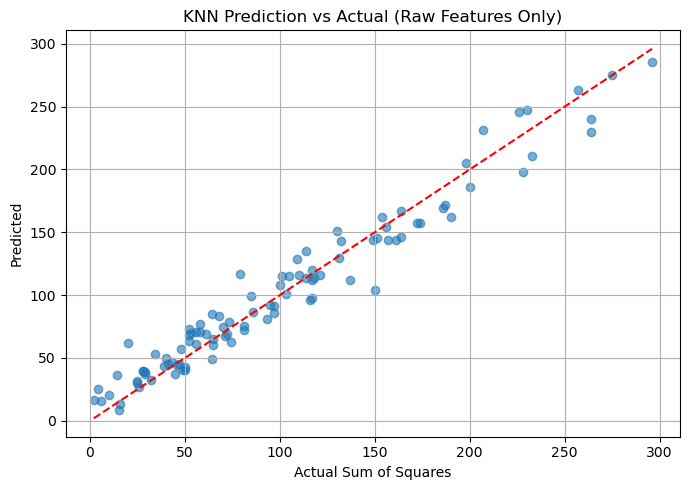

In [5]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

train_df = pd.read_csv('train_eigen_data.csv')
test_df = pd.read_csv('test_eigen_data.csv')

X_train = train_df[['a', 'b', 'c', 'd']]
y_train = train_df['sum_squared']

X_test = test_df[['a', 'b', 'c', 'd']]
y_true = test_df['sum_squared']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'n_neighbors': list(range(1, 21))}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Best K found: {best_k}")

knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\nKNN Model Evaluation (Raw Features Only):")
print(f"  MSE: {mse:.4f}")
print(f"  R²:  {r2:.4f}")

test_df['predicted_sum_squared'] = y_pred
test_df.to_csv('test_eigen_data.csv', index=False)
print("\nUpdated 'test_eigen_data.csv' with predictions.")

plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("Actual Sum of Squares")
plt.ylabel("Predicted")
plt.title("KNN Prediction vs Actual (Raw Features Only)")
plt.grid(True)
plt.tight_layout()
plt.show()

Best K found: 4

Enhanced KNN Model Evaluation:
  MSE: 193.9781
  R²:  0.9602

Updated 'test_eigen_data.csv' with predictions.


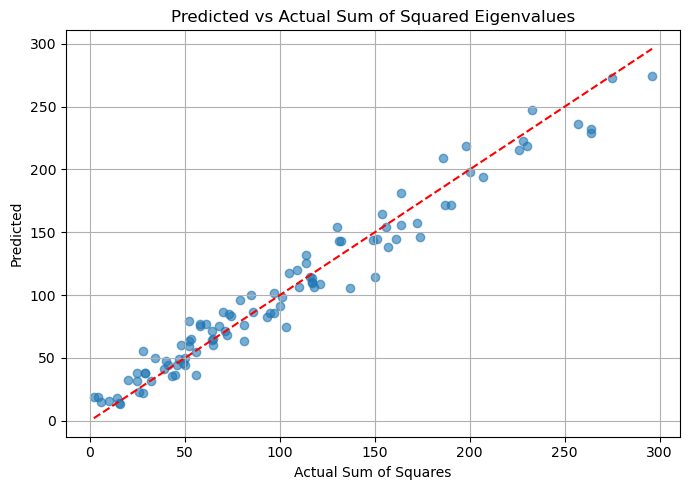

In [6]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

train_df = pd.read_csv('train_eigen_data.csv')
test_df = pd.read_csv('test_eigen_data.csv')

for df in [train_df, test_df]:
    df['trace'] = df['a'] + df['d']
    df['det'] = df['a'] * df['d'] - df['b'] * df['c']
    df['sym_score'] = abs(df['b'] - df['c'])

feature_cols = ['a', 'b', 'c', 'd', 'trace', 'det', 'sym_score']
X_train = train_df[feature_cols]
y_train = train_df['sum_squared']

X_test = test_df[feature_cols]
y_true = test_df['sum_squared']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'n_neighbors': list(range(1, 21))}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid,
                           scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Best K found: {best_k}")

knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print("\nEnhanced KNN Model Evaluation:")
print(f"  MSE: {mse:.4f}")
print(f"  R²:  {r2:.4f}")

test_df['predicted_sum_squared'] = y_pred
test_df.to_csv('test_eigen_data.csv', index=False)
print("\nUpdated 'test_eigen_data.csv' with predictions.")

plt.figure(figsize=(7,5))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("Actual Sum of Squares")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Sum of Squared Eigenvalues")
plt.grid(True)
plt.tight_layout()
plt.show()